In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
rads = pd.read_csv("environmental_radiation.csv")
health = pd.read_csv("community_health.csv")

In [6]:
rads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20485 entries, 0 to 20484
Data columns (total 10 columns):
location_code      20485 non-null object
sample_type        20485 non-null object
sample_location    20485 non-null object
sampling_freq      20472 non-null object
sampling_date      20485 non-null object
isotope_name       20485 non-null object
value              20465 non-null object
units              20484 non-null object
graph_value        20451 non-null float64
comment            465 non-null object
dtypes: float64(1), object(9)
memory usage: 1.6+ MB


In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24564 entries, 0 to 24563
Data columns (total 13 columns):
county_name               24564 non-null object
health_topic              24564 non-null object
indicator                 24564 non-null object
event_count               21647 non-null float64
avg_num_of_denominator    22261 non-null float64
unit_measurement          24564 non-null object
precent_or_rate           23928 non-null float64
low_limit_95p_CI          2144 non-null float64
upp_limit_95p_CI          2144 non-null float64
data_comment              2873 non-null object
year                      24564 non-null object
data_source               24564 non-null object
lat_long                  20692 non-null object
dtypes: float64(5), object(8)
memory usage: 2.4+ MB


In [11]:
health.health_topic.unique()

array(['Family Planning/Natality Indicators', 'Cancer Indicators',
       'Oral Health Indicators', 'Maternal and Infant Health Indicators',
       'Injury Indicators',
       'Socio-Economic Status and General Health Indicators',
       'Cardiovascular Disease Indicators',
       'Child and Adolescent Health Indicators',
       'Obesity and Related Indicators', 'Cirrhosis/Diabetes Indicators',
       'HIV/AIDS and Other Sexually Transmitted Infection Indicators',
       'Respiratory Disease Indicators',
       'Tobacco, Alcohol and Other Substance Abuse Indicators',
       'Communicable Disease Indicators',
       'Occupational Health Indicators'], dtype=object)

In [51]:
cancer = health.loc[health["health_topic"] == "Cancer Indicators"]
cancer = cancer.loc[cancer["indicator"] == "All cancer incidence rate per 100,000"]
cancer = cancer.drop(columns = ["health_topic", "indicator", "low_limit_95p_CI", "upp_limit_95p_CI", "data_comment", "unit_measurement", "data_source", "year", "lat_long", "year"])

In [52]:
cancer

,county_name,event_count,avg_num_of_denominator,precent_or_rate
7567,Franklin,851.0,51626.0,549.5
7851,Albany,5508.0,304694.0,602.6
7852,Allegany,911.0,48680.0,623.8
7853,Bronx,18038.0,1397357.0,430.3
7854,Broome,3768.0,199225.0,630.4
7855,Capital Region,17381.0,952095.0,608.5
7856,Cattaraugus,1613.0,79859.0,673.3
7857,Cayuga,1414.0,79775.0,590.8
7858,Central NY,18896.0,1025519.0,614.2
7859,Chautauqua,2921.0,134190.0,725.6


In [31]:
len(health.county_name.unique())

77

In [56]:
rads

,location_code,sample_type,sample_location,sampling_freq,sampling_date,isotope_name,value,units,graph_value,comment
0,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2014-12-29,GROSS BETA,6.4+/-1.1,pCi/1000M3,6.4,NaN
1,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-01-05,GROSS BETA,11.1+/-1.4,pCi/1000M3,11.1,NaN
2,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-01-12,GROSS BETA,13+/-1.6,pCi/1000M3,13.0,NaN
3,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-01-19,GROSS BETA,11.3+/-1.5,pCi/1000M3,11.3,NaN
4,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-01-29,GROSS BETA,11+/-1.2,pCi/1000M3,11.0,NaN
5,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-02-02,GROSS BETA,9.5+/-1.8,pCi/1000M3,9.5,NaN
6,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-02-09,GROSS BETA,13.7+/-1.6,pCi/1000M3,13.7,NaN
7,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-02-17,GROSS BETA,14+/-1.6,pCi/1000M3,14.0,NaN
8,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-02-24,GROSS BETA,16+/-2,pCi/1000M3,16.0,NaN
9,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2015-03-03,GROSS BETA,18+/-2,pCi/1000M3,18.0,NaN


In [58]:
rads.isotope_name.unique()

array(['GROSS BETA', 'BERYLLIUM-7', 'CESIUM-137', 'GROSS ALPHA',
       'RUTHENIUM-106', 'TRITIUM (HTO)', 'ZIRCONIUM-95', 'POTASSIUM-40',
       'CESIUM-134', 'RADIUM-226 (Bi-214)', 'IODINE-131', 'RADIUM-224',
       'THORIUM-232 (Ac-228)', 'STRONTIUM-89', 'STRONTIUM-90',
       'RADIUM-226', 'THORIUM-232', 'RADIUM-226 (BI-214)', 'TRITIUM',
       'COBALT-60', 'IODINE-129', 'TECHNETIUM-99', 'TECHNETIUM-99 ',
       'URANIUM-235', 'URANIUM-238', 'ACTINIUM-228', 'BISMUTH-214',
       'LEAD-212', 'LEAD-214', 'THALLIUM-208', 'THORIUM-234',
       'Radium-226', 'Bismuth-214 (based on Ra-226)',
       'Actinium-228 (based on Ra-228)', 'Lead-212 (based on Ra-228)',
       'Lead-214 (based on Ra-226)', 'Thallium-208 (based on Ra-228)',
       'Thorium-234 (based on U-238)', 'LEAD-210', 'MANGANESE-54',
       'ZINC-65', 'COBALT-58'], dtype=object)

In [63]:
radium = rads.loc[rads["isotope_name"].str.contains("RADIUM")]

In [64]:
radium

,location_code,sample_type,sample_location,sampling_freq,sampling_date,isotope_name,value,units,graph_value,comment
253,5151-002,FISH,DONAHUES POND,OCCASSIONALLY,2009-10-13,RADIUM-226 (Bi-214),5+/-4,pCi/kg,5.0,BOTTOM FEEDERS BLUEGILL AND BULLHEAD
258,5151-003,FISH,FORGE POND (PECONIC L.),OCCASSIONALLY,2009-09-22,RADIUM-226 (Bi-214),<2,pCi/kg,0.0,TOP FEEDERS LARGE MOUTH BASS
266,5151-004,FISH,SWAN POND,OCCASSIONALLY,2009-10-13,RADIUM-226 (Bi-214),17+/-8,pCi/kg,17.0,BOTTOM FEEDERS - BLUE GILL
267,5151-004,FISH,SWAN POND,OCCASSIONALLY,2009-10-13,RADIUM-226 (Bi-214),<2,pCi/kg,0.0,TOP FEEDERS LARGE MOUTH BASS
516,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2011-04-18,RADIUM-224,7.7+/-1.5,pCi/1000M3,7.7,NaN
517,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2011-04-11,RADIUM-226 (Bi-214),3+/-2,pCi/1000M3,3.0,NaN
518,5151-001,AIR,"BROOKHAVEN NAT'L LAB PERIMETER, STATION P-7",WEEKLY,2011-04-18,RADIUM-226 (Bi-214),3+/-1.9,pCi/1000M3,3.0,NaN
540,5151-006,WATER,PECONIC RIVER AT MANORVILLE,SEMIANNUALLY,2010-10-29,RADIUM-226 (Bi-214),5+/-3,pCi/L,5.0,SAMPLING OCCURS SPORADICALLY AS PECONIC RIVER ...
1265,5941-002,WATER,"HUDSON RIVER, BUCHANAN INLET",MONTHLY,2010-04-30,RADIUM-224,8+/-7,pCi/L,8.0,NaN
1266,5941-002,WATER,"HUDSON RIVER, BUCHANAN INLET",MONTHLY,2010-04-30,RADIUM-226,19+/-9,pCi/L,19.0,NaN


In [67]:
radium_air = radium.loc[radium["sample_type"] == "AIR"]

In [69]:
len(radium_air)

33

In [72]:
rad_1 = pd.read_csv("rad_1.csv")
rad_bas = pd.read_csv("rad_bas.csv")

In [73]:
rad_1

,County,Test Location in Home,# of Homes Tested,Average Radon pCi/L,Geo Mean,Geo S.D.,Highest (pCi/L),Number of Radon Tests <4 pCi/L,Number of Radon Tests ≥4 & <20 pCi/L,Number of Radon Tests >=20 pCi/L,Location 1
0,ALBANY,1st Floor,1538,1.93,0.67,3.69,89.8,1401,115,22,"(42.678066, -73.814233)"
1,ALLEGANY,1st Floor,241,3.44,1.44,3.79,56.7,187,47,7,"(42.226801, -78.020567)"
2,BROOME,1st Floor,954,3.12,1.45,3.36,72.9,757,182,15,"(42.122015, -75.933191)"
3,CATTARAUGUS,1st Floor,500,4.04,1.75,3.64,174.4,360,133,7,"(42.224267, -78.606673)"
4,CAYUGA,1st Floor,1172,2.36,1.25,3.06,91.2,1000,164,8,"(42.940095, -76.560755)"
5,CHAUTAUQUA,1st Floor,261,2.81,1.09,3.78,58.7,216,40,5,"(42.246904, -79.315313)"
6,CHEMUNG,1st Floor,474,6.40,2.57,4.17,224.9,282,165,27,"(42.116644, -76.812331)"
7,CHENANGO,1st Floor,462,3.66,1.44,4.31,75.2,349,102,11,"(42.481798, -75.570013)"
8,CLINTON,1st Floor,112,1.12,0.58,3.06,11.6,107,5,0,"(44.731944, -73.548883)"
9,COLUMBIA,1st Floor,353,2.98,1.50,3.59,24.1,269,82,2,"(42.276913, -73.682168)"


In [74]:
rad_bas

,County,Test Location in Home,# of Homes Tested,Average Radon pCi/L,Geo Mean,Geo S.D.,Highest (pCi/L),Number of Radon Tests <4 pCi/L,Number of Radon Tests ≥4 & <20 pCi/L,Number of Radon Tests >=20 pCi/L,Location 1
0,ALBANY,Basement,2843,5.40,2.00,3.33,394.6,2139,584,120,"(42.678066, -73.814233)"
1,ALLEGANY,Basement,538,10.72,4.67,3.80,216.6,242,221,75,"(42.226801, -78.020567)"
2,BROOME,Basement,3353,5.93,2.87,3.28,210.7,2083,1076,194,"(42.122015, -75.933191)"
3,CATTARAUGUS,Basement,1481,9.43,4.20,3.35,522.1,733,583,165,"(42.224267, -78.606673)"
4,CAYUGA,Basement,1309,4.71,2.82,2.64,145.6,877,394,38,"(42.940095, -76.560755)"
5,CHAUTAUQUA,Basement,1031,6.06,2.74,3.50,141.0,663,311,57,"(42.246904, -79.315313)"
6,CHEMUNG,Basement,2075,12.40,7.01,3.23,118.3,612,1046,417,"(42.116644, -76.812331)"
7,CHENANGO,Basement,678,9.68,4.91,3.31,105.5,284,309,85,"(42.481798, -75.570013)"
8,CLINTON,Basement,275,2.07,1.23,2.78,23.2,244,30,1,"(44.731944, -73.548883)"
9,COLUMBIA,Basement,718,6.93,3.71,3.18,298.0,353,321,44,"(42.276913, -73.682168)"


In [81]:
cancer["county_name"] = cancer["county_name"].str.upper()


In [90]:
blacklist = list(set(cancer["county_name"]) - set(rad_1.County))
cancer1 = cancer[~cancer.county_name.isin(blacklist)]

In [101]:
rad_1 = pd.DataFrame(data = rad_1, columns = ["County", "Average Radon pCi/L"])


In [103]:
rad_bas = pd.DataFrame(data = rad_bas, columns = ["County", "Average Radon pCi/L"])


In [105]:
rad_1["bas"] = rad_bas["Average Radon pCi/L"]

In [109]:
rad_1["av"] = rad_1.mean(axis = 1)

In [112]:
rad_1 = rad_1.drop(columns = ["Average Radon pCi/L", "bas"])

In [113]:
rad_1

,County,av
0,ALBANY,3.665
1,ALLEGANY,7.080
2,BROOME,4.525
3,CATTARAUGUS,6.735
4,CAYUGA,3.535
5,CHAUTAUQUA,4.435
6,CHEMUNG,9.400
7,CHENANGO,6.670
8,CLINTON,1.595
9,COLUMBIA,4.955


In [123]:
cancer1 = cancer1.sort_values("county_name")
cancer1.index = rad_1.index

ValueError: Length mismatch: Expected axis has 57 elements, new values have 59 elements

In [121]:
rad_1["cancer"] = list(cancer1["precent_or_rate"])

ValueError: Length of values does not match length of index

In [122]:
rad_1

,County,av,cancer
0,ALBANY,3.665,NaN
1,ALLEGANY,7.080,NaN
2,BROOME,4.525,NaN
3,CATTARAUGUS,6.735,NaN
4,CAYUGA,3.535,NaN
5,CHAUTAUQUA,4.435,NaN
6,CHEMUNG,9.400,NaN
7,CHENANGO,6.670,NaN
8,CLINTON,1.595,NaN
9,COLUMBIA,4.955,NaN


In [125]:
cancer1.reset_index()

,index,county_name,event_count,avg_num_of_denominator,precent_or_rate
0,7851,ALBANY,5508.0,304694.0,602.6
1,7852,ALLEGANY,911.0,48680.0,623.8
2,7854,BROOME,3768.0,199225.0,630.4
3,7856,CATTARAUGUS,1613.0,79859.0,673.3
4,7857,CAYUGA,1414.0,79775.0,590.8
5,7859,CHAUTAUQUA,2921.0,134190.0,725.6
6,7860,CHEMUNG,1732.0,88848.0,649.8
7,7861,CHENANGO,1062.0,50162.0,705.7
8,7862,CLINTON,1555.0,81862.0,633.2
9,7863,COLUMBIA,1256.0,62709.0,667.6


In [166]:
cancer1.rename(columns={'county_name':'County'}, inplace=True)

finrad = rad_1.merge(cancer1, on = "County",)

In [167]:
finrad = finrad.drop(columns = ["cancer", "event_count", "avg_num_of_denominator"])

In [168]:
finrad["av"].corr(finrad["precent_or_rate"])

0.04274017987859017

Text(0,0.5,'Cancer incidence per 100,000')

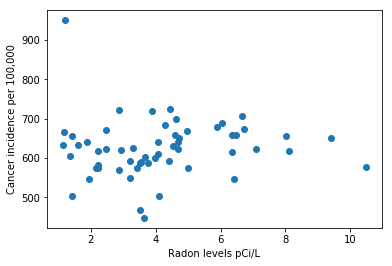

In [170]:
plt.scatter(finrad["av"], finrad["precent_or_rate"])
plt.xlabel("Radon levels pCi/L")
plt.ylabel("Cancer incidence per 100,000")

In [171]:
finrad = finrad.drop(19)

In [172]:
finrad["av"].corr(finrad["precent_or_rate"])

0.19761038009179427

Text(0,0.5,'Cancer incidence per 100,000')

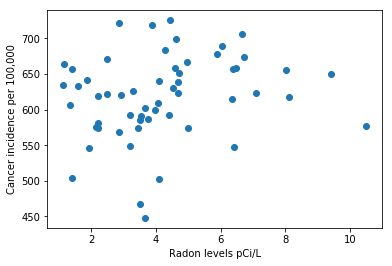

In [173]:
plt.scatter(finrad["av"], finrad["precent_or_rate"])
plt.xlabel("Radon levels pCi/L")
plt.ylabel("Cancer incidence per 100,000")

In [143]:
health

,county_name,health_topic,indicator,event_count,avg_num_of_denominator,unit_measurement,precent_or_rate,low_limit_95p_CI,upp_limit_95p_CI,data_comment,year,data_source,lat_long
0,Albany,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,2043.0,3144.0,Percentage,21.7,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.678066, -73.814233)"
1,Allegany,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,399.0,487.0,Percentage,27.3,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.226801, -78.020567)"
2,Bronx,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,10032.0,21249.0,Percentage,15.7,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(40.85589, -73.868294)"
3,Broome,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,1654.0,2083.0,Percentage,26.5,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.122015, -75.933191)"
4,Capital Region,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,6273.0,9774.0,Percentage,21.4,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016",NaN
5,Cattaraugus,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,597.0,915.0,Percentage,21.7,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.224267, -78.606673)"
6,Cayuga,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,600.0,774.0,Percentage,25.8,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.940095, -76.560755)"
7,Central NY,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,8201.0,11085.0,Percentage,24.7,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016",NaN
8,Chautauqua,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,1055.0,1408.0,Percentage,25.0,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.246904, -79.315313)"
9,Chemung,Family Planning/Natality Indicators,Percentage of births within 24 months of previ...,823.0,986.0,Percentage,27.8,NaN,NaN,NaN,2012-2014,"2012-2014 Vital Statistics Data as of May, 2016","(42.116644, -76.812331)"


In [148]:
lungc = health.loc[health["indicator"] == "Age-adjusted lung and bronchus cancer incidence rate per 100,000"]
lungc = lungc.drop(columns = ["health_topic", "indicator", "low_limit_95p_CI", "upp_limit_95p_CI", "data_comment", "unit_measurement", "data_source", "year", "lat_long", "year"])
lungc["county_name"] = lungc["county_name"].str.upper()
blacklist2 = list(set(lungc["county_name"]) - set(rad_1.County))
lungc = lungc[~lungc.county_name.isin(blacklist2)]
lungc = lungc.sort_values("county_name")
lungc.reset_index()


,index,county_name,event_count,avg_num_of_denominator,precent_or_rate
0,16949,ALBANY,767.0,304694.0,72.1
1,16950,ALLEGANY,144.0,48680.0,80.0
2,16952,BROOME,452.0,199225.0,58.4
3,16954,CATTARAUGUS,241.0,79859.0,80.2
4,16955,CAYUGA,223.0,79775.0,71.9
5,16957,CHAUTAUQUA,367.0,134190.0,68.5
6,16958,CHEMUNG,259.0,88848.0,76.3
7,16959,CHENANGO,155.0,50162.0,75.7
8,16960,CLINTON,298.0,81862.0,106.0
9,16961,COLUMBIA,217.0,62709.0,76.9


In [149]:
lungc.rename(columns={'county_name':'County'}, inplace=True)


In [182]:
finrad2 = rad_1.merge(lungc, on = "County",)

In [183]:
finrad2

,County,av,cancer,event_count,avg_num_of_denominator,precent_or_rate
0,ALBANY,3.665,NaN,767.0,304694.0,72.1
1,ALLEGANY,7.080,NaN,144.0,48680.0,80.0
2,BROOME,4.525,NaN,452.0,199225.0,58.4
3,CATTARAUGUS,6.735,NaN,241.0,79859.0,80.2
4,CAYUGA,3.535,NaN,223.0,79775.0,71.9
5,CHAUTAUQUA,4.435,NaN,367.0,134190.0,68.5
6,CHEMUNG,9.400,NaN,259.0,88848.0,76.3
7,CHENANGO,6.670,NaN,155.0,50162.0,75.7
8,CLINTON,1.595,NaN,298.0,81862.0,106.0
9,COLUMBIA,4.955,NaN,217.0,62709.0,76.9


In [184]:
finrad2 = finrad2.drop(19)

In [185]:
finrad2["av"].corr(finrad2["precent_or_rate"])

0.10885367644030546

Text(0,0.5,'Lung cancer incidence per 100,000')

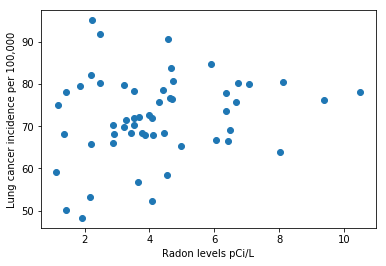

In [181]:
plt.scatter(finrad2["av"], finrad2["precent_or_rate"])
plt.xlabel("Radon levels pCi/L")
plt.ylabel("Lung cancer incidence per 100,000")

In [177]:
from scipy.stats import pearsonr

pearsonr(finrad["av"], finrad["precent_or_rate"])

(0.1976103800917942, 0.14432663033863008)

In [161]:
health.loc[health["health_topic"] == "Obesity and Related Indicators"].indicator.unique()

array(['Age-adjusted cerebrovascular disease (stroke) mortality rate per 100,000',
       'Age-adjusted cardiovascular disease mortality rate per 100,000',
       'Age-adjusted diabetes mortality rate per 100,000',
       'Age-adjusted percentage of adults with physician diagnosed angina, heart attack or stroke',
       'Age-adjusted percentage of adults with physician diagnosed diabetes',
       'Percentage of pregnant women in WIC who were pre-pregnancy overweight but not obese (BMI 25 to less than 30)',
       'Percentage of pregnant women in WIC who were pre-pregnancy obese (BMI 30 or higher)',
       'Percentage of WIC infants breastfeeding at least 6 months',
       'Percentage overweight but not obese (85th-<95th percentile) - Students (with weight status information in SWSCRS) in elementary, middle and high school',
       'Percentage obese (95th percentile or higher) - Students (with weight status information in SWSCRS) in elementary, middle and high school',
       'Percentag

In [179]:
finrad2 = finrad2.drop(8)